<a href="https://colab.research.google.com/github/jpan0829/Emotion-Detection-Simulation/blob/main/Project_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp ./drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 94% 113M/121M [00:00<00:00, 106MB/s] 
100% 121M/121M [00:01<00:00, 124MB/s]


In [ ]:
!unzip face-expression-recognition-dataset.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating: images/validation/fear/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D,Conv2DTranspose,LeakyReLU,Reshape
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import SGD,RMSprop
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from PIL import Image

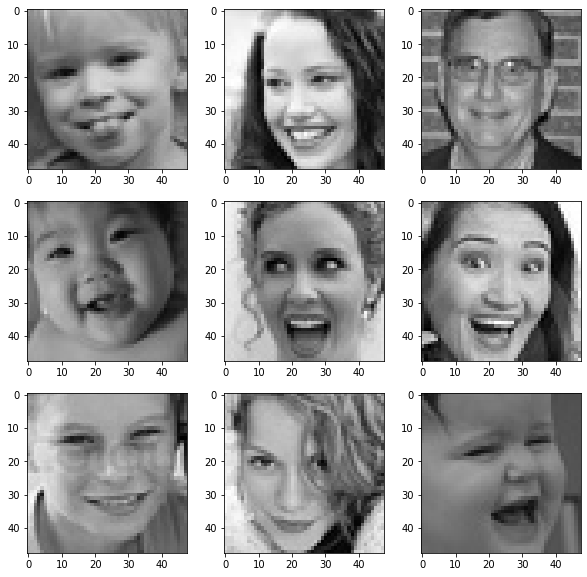

In [ ]:
expression = 'happy'
path = "images/"
plt.figure(figsize= (10,10))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = Image.open(path+"train/"+expression+"/"+
                  os.listdir(path + "train/" + expression)[i]).convert("RGB")
    plt.imshow(img, cmap = "Greys_r")
plt.show()

(48, 48, 3)
27695.jpg


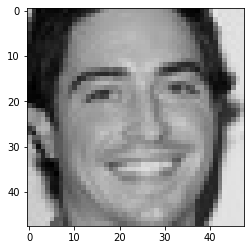

In [ ]:
img = Image.open(path+"train/"+expression+"/"+
                 os.listdir(path + "train/" + expression)[0]).convert('RGB')
i = np.asarray(img)#.flatten() #+50*np.ones(i.shape)
print(i.shape)
print(os.listdir(path + "train/" + expression)[0])
plt.imshow(Image.fromarray(i))#, cmap = "Greys_r")


In [ ]:
i

array([[[185, 185, 185],
        [ 50,  50,  50],
        [  3,   3,   3],
        ...,
        [224, 224, 224],
        [220, 220, 220],
        [226, 226, 226]],

       [[157, 157, 157],
        [ 39,  39,  39],
        [ 11,  11,  11],
        ...,
        [224, 224, 224],
        [223, 223, 223],
        [222, 222, 222]],

       [[ 96,  96,  96],
        [ 35,  35,  35],
        [ 10,  10,  10],
        ...,
        [223, 223, 223],
        [225, 225, 225],
        [226, 226, 226]],

       ...,

       [[203, 203, 203],
        [207, 207, 207],
        [201, 201, 201],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[200, 200, 200],
        [204, 204, 204],
        [208, 208, 208],
        ...,
        [225, 225, 225],
        [226, 226, 226],
        [226, 226, 226]],

       [[206, 206, 206],
        [201, 201, 201],
        [204, 204, 204],
        ...,
        [224, 224, 224],
        [225, 225, 225],
        [226, 226, 226]]

# CNN

In [ ]:
batch_size  = 128
picture_size = 48

gen_train  = ImageDataGenerator()
gen_val = ImageDataGenerator()

train = gen_train.flow_from_directory(path+"train",
                                       target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical')

val = gen_val.flow_from_directory(path+"validation",
                                    target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical')


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
train.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
no_of_classes = 7
lr = 0.0001
model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(5,5),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(256,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=lr),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       7

In [ ]:
#save the model
checkpoint = ModelCheckpoint("./model.cnn", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.00001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [ ]:
epochs = 50
process = model.fit(x=train,
                                steps_per_epoch=train.n//train.batch_size,
                                epochs=epochs,
                                validation_data = val,
                                validation_steps = val.n//val.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50
224/225 [============================>.] - ETA: 0s - loss: 2.0424 - accuracy: 0.2220
Epoch 00001: val_accuracy improved from -inf to 0.28224, saving model to ./model.cnn
INFO:tensorflow:Assets written to: ./model.cnn/assets
225/225 [==============================] - 17s 61ms/step - loss: 2.0425 - accuracy: 0.2221 - val_loss: 1.7665 - val_accuracy: 0.2822 - lr: 1.0000e-04
Epoch 2/50
225/225 [==============================] - ETA: 0s - loss: 1.8963 - accuracy: 0.2572
Epoch 00002: val_accuracy did not improve from 0.28224
225/225 [==============================] - 10s 43ms/step - loss: 1.8963 - accuracy: 0.2572 - val_loss: 1.8342 - val_accuracy: 0.2473 - lr: 1.0000e-04
Epoch 3/50
225/225 [==============================] - ETA: 0s - loss: 1.8216 - accuracy: 0.2897
Epoch 00003: val_accuracy improved from 0.28224 to 0.33253, saving model to ./model.cnn
INFO:tensorflow:Assets written to: ./model.cnn/assets
225/225 [==============================] - 13s 58ms/step - loss: 1.8216 - ac

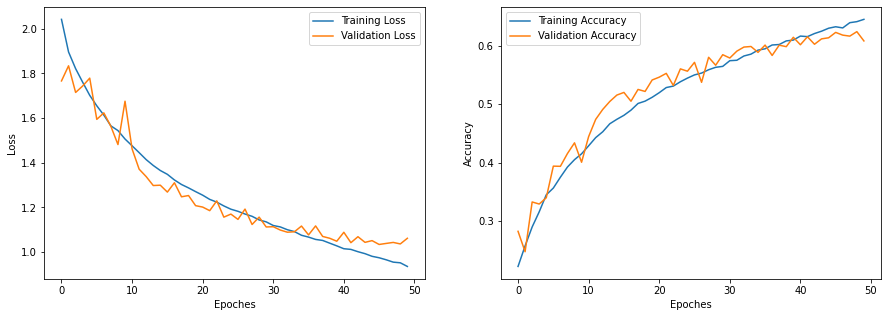

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.plot(process.history['loss'], label='Training Loss')
plt.plot(process.history['val_loss'], label='Validation Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.plot(process.history['accuracy'], label='Training Accuracy')
plt.plot(process.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='best')
plt.show()

# GAN

## Data preprocessing

In [ ]:
Batch_size = 16
train_dataset = []
batch = []
count = 0
#print(train_dataset)
for filename in os.listdir(path + "train/" + expression):
  count += 1
  img = Image.open(path+"train/"+expression+"/"+ filename).convert('RGB')
  arr = np.asarray(img)
  batch.append(arr)
  if count % Batch_size == 0:
    train_dataset.append(np.array(batch))
    batch = []
train_dataset = np.array(train_dataset) /255
#train_dataset = np.expand_dims(train_dataset,axis=0)
train_dataset.shape

(447, 16, 48, 48, 3)

In [ ]:
train_dataset.shape

(447, 16, 48, 48, 3)

In [ ]:
train_dataset[0].shape

(16, 48, 48, 3)

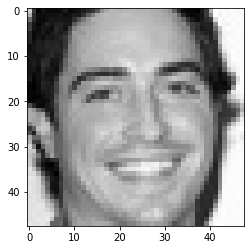

In [ ]:
plt.imshow(train_dataset[0][0,:,:,0], cmap='gray')

## Generator

In [ ]:
def make_generator():
  '''
  Generator model
  '''
  model = Sequential()

  '''
  model.add(Dense(12*12*256, use_bias=False, input_shape=(100,)))
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Reshape((12, 12, 256)))
  assert model.output_shape == (None, 12, 12, 256) # Note: None is the batch size

  model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  assert model.output_shape == (None, 12, 12, 128)
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 24, 24, 64)
  model.add(BatchNormalization())
  model.add(LeakyReLU())

  model.add(Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  assert model.output_shape == (None, 48, 48, 3)
  '''
  #'''
  #Down-sampling
  model.add(Conv2D(64,(5,5),strides=(2,2), padding = 'same',input_shape=(48,48,3)) )
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Conv2D(128,(3,3),strides=(2,2), padding = 'same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  #Bottleneck
  model.add(Conv2D(128,(3,3), strides=(1,1),padding = 'same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Conv2D(128,(3,3), strides=(1,1),padding = 'same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))

  model.add(Conv2D(128,(3,3), strides=(1,1),padding = 'same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  #Up-sampling
  model.add(Conv2DTranspose(128, (3,3), strides=(2,2), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv2D(3, (3,3), strides=(1,1), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('tanh'))
  #'''
  return model

In [ ]:
generator = make_generator()
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        4864      
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 batch_normalization_7 (Batc  (None, 12, 12, 128)      512       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 12, 12, 128)      

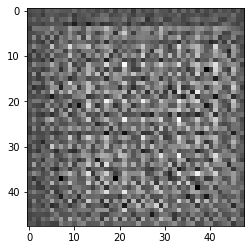

In [ ]:
noise = tf.random.normal([1,48,48,3])
#print(noise)
generated_image = generator(noise, training=False)
#print(generated_image)
plt.imshow(generated_image[0,:,:,0], cmap='gray')

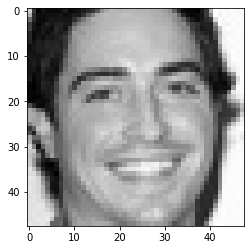

In [ ]:
plt.imshow(train_dataset[0][0,:,:,0], cmap='gray')

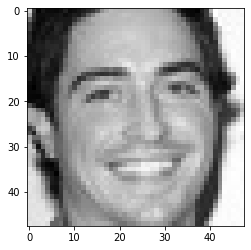

In [ ]:
plt.imshow(generated_image[0,:,:,0]+ train_dataset[0][0,:,:,0], cmap='gray')

## Discriminator

In [ ]:
def make_discriminator():
  '''
  Discriminator
  '''
  #'''
  model = Sequential()

  model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(48, 48, 3)))
  model.add(LeakyReLU())
  #model.add(Dropout(0.3))

  model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  model.add(LeakyReLU())
  #model.add(Dropout(0.3))

  model.add(Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
  model.add(LeakyReLU())
  #model.add(Dropout(0.3))

  model.add(Conv2D(512, (5, 5), strides=(2, 2), padding='same'))
  model.add(LeakyReLU())
  model.add(Dropout(0.3))

  model.add(Flatten())
  model.add(Dense(1))

  #'''
  '''
  d_model = Sequential()
  d_model.add(BatchNormalization())
  d_model.add(Dropout(0.3))
  d_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
  d_model.add(LeakyReLU(0.2))
  d_model.add(Dropout(0.3))
  d_model.add(Conv2D(128, (3, 3), strides=2, padding='same'))  #
  d_model.add(LeakyReLU(0.2))
  d_model.add(Dropout(0.3))
  d_model.add(Conv2D(256, (3, 3), padding='same'))
  d_model.add(LeakyReLU(0.2))
  d_model.add(Dropout(0.3))
  d_model.add(Conv2D(512, (3, 3), strides=2, padding='same'))
  d_model.add(LeakyReLU(0.2))
  d_model.add(Flatten())
  d_model.add(Dropout(0.3))
  d_model.add(Dense(1, activation='sigmoid'))  #
  '''
  return model

In [ ]:
discriminator = make_discriminator()
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        4864      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 24, 24, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 128)       204928    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 12, 12, 128)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 6, 6, 256)         819456    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 6, 6, 256)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 3, 512)        

In [ ]:
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[0.00050915]], shape=(1, 1), dtype=float32)


In [ ]:
decision = discriminator(train_dataset[0][:1])
print(decision)

tf.Tensor([[0.06047921]], shape=(1, 1), dtype=float32)


## Train

In [ ]:
# This method returns a helper function to compute loss
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = loss_fn(tf.ones_like(real_output), real_output)
    fake_loss = loss_fn(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return loss_fn(tf.ones_like(fake_output), fake_output)

generator_optimizer = Adam(learning_rate=0.001)
discriminator_optimizer = Adam(learning_rate=0.001)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 1000
# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
BATCH_SIZE = [16]
noise_dim = [48,48,3]
#seed = tf.random.normal([BATCH_SIZE,noise_dim])
seed = tf.random.normal(BATCH_SIZE+noise_dim)
np.array(seed).shape

(16, 48, 48, 3)

In [ ]:
# tf.function annotation causes the function
# to be "compiled" as part of the training
#@tf.function
def train_step(images):

    # 1 - Create a random noise to feed it into the model
    # for the image generation
    #noise = tf.random.normal([BATCH_SIZE,noise_dim])
    noise = tf.random.normal(BATCH_SIZE+noise_dim)
    noise = np.array(noise)
    # 2 - Generate images and calculate loss values
    # GradientTape method records operations for automatic differentiation.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    # 3 - Calculate gradients using loss values and model variables
    # "gradient" method computes the gradient using
    # operations recorded in context of this tape (gen_tape and disc_tape).

    # It accepts a target (e.g., gen_loss) variable and
    # a source variable (e.g.,generator.trainable_variables)
    # target --> a list or nested structure of Tensors or Variables to be differentiated.
    # source --> a list or nested structure of Tensors or Variables.
    # target will be differentiated against elements in sources.

    # "gradient" method returns a list or nested structure of Tensors
    # (or IndexedSlices, or None), one for each element in sources.
    # Returned structure is the same as the structure of sources.
    gradients_of_generator = gen_tape.gradient(gen_loss,
                                               generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss,
                                                discriminator.trainable_variables)

    # 4 - Process  Gradients and Run the Optimizer
    # "apply_gradients" method processes aggregated gradients.
    # ex: optimizer.apply_gradients(zip(grads, vars))
    """
    Example use of apply_gradients:
    grads = tape.gradient(loss, vars)
    grads = tf.distribute.get_replica_context().all_reduce('sum', grads)
    # Processing aggregated gradients.
    optimizer.apply_gradients(zip(grads, vars), experimental_aggregate_gradients=False)
    """
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
import time
from IPython import display # A command shell for interactive computing in Python.

def train(dataset, epochs):
  # A. For each epoch, do the following:
  for epoch in range(epochs):
    start = time.time()
    # 1 - For each batch of the epoch,
    for image_batch in dataset:
      # 1.a - run the custom "train_step" function
      # we just declared above
      train_step(image_batch)

    # 2 - Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # 3 - Save the model every 5 epochs as
    # a checkpoint, which we will use later
    if (epoch + 1) % 5 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    # 4 - Print out the completed epoch no. and the time spent
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # B. Generate a final image after the training is completed
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  # 1 - Generate images
  predictions = model(test_input, training=False)
  # 2 - Plot the generated images
  fig = plt.figure(figsize=(4,4))
  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0], cmap='gray')
      plt.axis('off')
  # 3 - Save the generated images
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

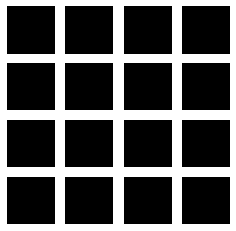

Time for epoch 795 is 29.071844339370728 sec


KeyboardInterrupt: ignored

In [ ]:
train(train_dataset, EPOCHS)

Thanks to the basic GAN codes that generating digits from 0 to 9 as following links: https://towardsdatascience.com/image-generation-in-10-minutes-with-generative-adversarial-networks-c2afc56bfa3b

@article{Pumarola_ijcv2019,
    title={GANimation: One-Shot Anatomically Consistent Facial Animation},
    author={A. Pumarola and A. Agudo and A.M. Martinez and A. Sanfeliu and F. Moreno-Noguer},
    booktitle={International Journal of Computer Vision (IJCV)},
    year={2019}
}
